# T1.2 Variables contínues i regla de Bayes

# Índex

1. Variables contínues
2. Teorema de Bayes en el cas continu
3. La regla de decisió de Bayes
4. Classificadors generatius i discriminatius

# 1 Variables contínues

**Funció de densitat de probabilitat:** $\;$ caracterització usual de les variables contínues per a la representació de coneixement probabilístic
$$p(x)\geq 0 \quad \text{per a tot $x$} \qquad \text{i} \qquad \int p(x)\,dx = 1$$

**La densitat normal:** $\;p(x)\sim\mathcal{N}(\mu, \sigma^2)$
$$p(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\,\sigma^2}\,\right)\qquad%
P(x\in[\mu\pm 1.96\sigma])=0.95$$

**Exemple:** $\;$ densitats normals amb $\,\mu=0\,$ y $\,\sigma^2=0.5, 1, 2$

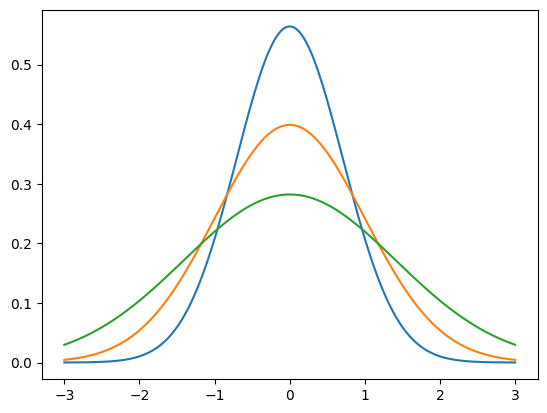

In [1]:
import numpy as np; from scipy.stats import norm; import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 200)
plt.plot(x, norm.pdf(x, 0, np.sqrt(0.5)), x, norm.pdf(x, 0, 1), x, norm.pdf(x, 0, np.sqrt(2)));

# 2 Teorema de Bayes en el cas continu

**Teorema de Bayes en el cas continu:** $\;$ probabilitat d'una hipótesi $\,y\,$ després d'observar una evidència (nova) $x$
$$P(y\mid x) = P(y)\,\frac{p(x\mid y)}{p(x)}$$

**Exemple:** $\;x=\,$ resultat d'un test de saliva per al diagnòstic de càries
* Sense càries, $\,c=0,\,p(x\mid c=0)\sim\mathcal{N}(\mu=0, \sigma^2=1)$
* Amb càries, $\,c=0,\,p(x\mid c=1)\sim\mathcal{N}(\mu=2, \sigma^2=0.5)$
* Sabem que la probabilitat (a priori) de càries és: $\,P(c=1)=0.34$
* **Si el test dóna $x=2$, quina és la probabilitat (a posteriori) de càries?**
$$P(c=1\mid x=2) = P(c=1)\,\dfrac{p(x=2\mid c=1)}{p(x=2)} = 0.340\,\dfrac{0.798}{0.307} = 0.884$$
* Observa que primer calia trobar la (densitat de) probabilitat (a priori) de test $x=2$:
$$\begin{align*}
p(x=2)&=P(c=0)p(x=2\mid c=0)+P(c=1)p(x=2\mid c=1)\\
&=(1-0.34)\cdot 0.054+0.34\cdot 0.798=0.307
\end{align*}$$

In [2]:
Pc1 = 0.34; px2Dc0 = norm.pdf(2, 0, 1); px2Dc1 = norm.pdf(2, 2, 0.5)
px2 = (1-Pc1) * px2Dc0 + Pc1 * px2Dc1; Pc1Dx2 = Pc1 * px2Dc1 / px2
print(f"px2Dc0 = {px2Dc0:.3f}  px2Dc1 = {px2Dc1:.3f}  px2 = {px2:.3f}  Pc1Dx2 = {Pc1Dx2:.3f}")

px2Dc0 = 0.054  px2Dc1 = 0.798  px2 = 0.307  Pc1Dx2 = 0.884


# 3 La regla de decisió de Bayes

**Regla de decisió de Bayes:** $\;$ prediu una hipòtesi després d'observar una evidència $\,x\,$ mitjançant la tria, entre un conjunt d'hipòtesis possibles $\,\mathcal{C},\,$ d'una hipòtesi de màxima **probabilitat a posteriori** (de l'observació de l'evidència)
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x)$$

**Probabilitat d'error:** $\;$ és a dir, probabilitat de que la hipòtesi predita siga distinta de la realment produïda
$$P(\text{error}\mid x)=1-P(c^*(x)\mid x)$$

**Optimalitat de la regla de Bayes:** $\;$ cap altra tria milloraria aquesta probabilitat d'error!

**Exemple del dentista:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
    P(c=0\mid x=2) = 0.116\\ %
    P(c=1\mid x=2) = 0.884\end{array}\right)=1$$

**Regla de Bayes en funció de probabilitats a priori i (densitats) condicionals de les classes:** $\;$ en comptes (d'arg-)maximitzar $\,P(c\mid x)\,$ en $c$, ho fem en funció de $\,P(c)\,p(x\mid c)$ ja que el resultat és el mateix
$$\begin{align*}
  c^*(x) &= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x)\\
         &= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,\frac{p(x\mid c)}{p(x)}\\
         &= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)
\end{align*}$$

**Exemple del dentista:**
$$c^*(x=2)=\operatorname*{argmax}_c\left(\begin{array}{l}
P(c=0)\,p(x=2\mid c=0) = 0.036\\ %
P(c=1)\,p(x=2\mid c=1) = 0.271
\end{array}\right)=1$$

# 4 Classificadors generatius i discriminatius

**Regla de Bayes en classificació:** $\;$ les hipòtesis són les classes i l'evidència $x$ és un objecte que classifiquem amb mínima probabilitat d'error
$$c^*(x) = \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c\mid x) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; p(x, c) %
= \operatorname*{argmax}_{c\in\mathcal{C}} \; P(c)\,p(x\mid c)$$

**Classificadors generatius:** $\;$ classifiquen a partir de priors i densitats condicionals (estimades)

**Classificadors discriminatius:** $\;$ classifiquen a partir de les posteriors (estimades) directament

**Comparació básica entre generatius i discriminatius:**
* **Preprocés de característiques:** $\;$ més flexibles els discriminatius perquè, a diferència dels generatius, no requereixen modelar densitats de probabilitat sobre l'espai de representació de les dades
* **Dificultat de l'aprenentatge:** $\;$ més fàcil en el cas dels generatius, usualment amb comptes i mitjanes
* **Precisió predictiva:** $\;$ millor els discriminatius ja que modelar $\,P(c\mid x)\,$ directament sol ser més fàcil que fer-ho per mitjà de les condicionals de les classes
* **Tractament de noves classes:** $\;$ més senzill en el cas dels generatius perquè permeten afegir classes noves a un problema sense re-entrenar les condicionals de les classes anteriors